# 프로젝트명: XAI(eXplanable AI) 실습 1 (Partial Dependence Plot - PDP)

#### 시각화 vs XAI의 차이

- XAI는 모델이 `왜 이런 결과를 선택했는지 해석`할 수 있게 해주므로, 일반적인 시각화랑은 다릅니다.

#### 🚨 주의사항
- XAI 기법은 모델의 예측값을 설명하기 위한 것
이므로, 현상 자체를 설명하는 것이 아닙니다. (물리법칙, 타 도메인 법칙들)
- 원인과 결과를 나타내는 인과추론이 아니라, 상관관계에 가깝기 때문에 인과추론을 위해선 해당 도메인 지식이 반드시 필요합니다.

### 1. 일반적인 모델 결과 해석방법 (XGBoost)

#### 실습 데이터 : 피마 인디언 당뇨병 분류 모델

- [X] Pregnancies: 임신 횟수
- [X] Glucose: 포도당 부하 검사 수치
- [X] BloodPressure: 혈압(mm Hg)
- [X] SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- [X] Insulin: 혈청 인슐린(mu U/ml)
- [X] BMI: 체질량지수(체중(kg)/키(m))^2
- [X] DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- [X] Age: 나이
- [Y] Outcome: 클래스 결정 값(0 또는 1)

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd

# 피마 당뇨병 데이터 세트 불러오기
dataset = pd.read_csv('https://blog.kakaocdn.net/dn/cRNQNq/btsHmTFs2EK/SZCyIMQC5M83BJ9cIPJB4K/diabetes.csv?attach=1&knm=tfile.csv')


In [ ]:
3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### XGBoost 모델 학습

In [4]:
# 데이터 세트를 입력 데이터와 레이블로 분리
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 학습 데이터로 모델 학습 시키기
model = XGBClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측하기
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# 정확도 출력하기
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.87%


### 2. 특정 환자 데이터로 예측하기

In [5]:
# 예측할 환자 데이터
patient = pd.DataFrame({
    'Pregnancies': [0],
    'Glucose': [161],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [28.1],
    'DiabetesPedigreeFunction': [0.527],
    'Age': [20]
})

# 환자 데이터로 예측하기
prediction = model.predict(patient)
print("✅ 당뇨병 양성인지?: %d" % prediction[0], "\n(1이면 당뇨병, 0이면 당뇨병이 아닙니다.)")

# 확률로 예측하기
prediction = model.predict_proba(patient)
print("✅ 당뇨병일 확률: %.2f%%" % (prediction[0][1] * 100.0))
print("❌ 당뇨가 아닐 확률: %.2f%%" % (prediction[0][0] * 100.0))

✅ 당뇨병 양성인지?: 0 
(1이면 당뇨병, 0이면 당뇨병이 아닙니다.)
✅ 당뇨병일 확률: 35.74%
❌ 당뇨가 아닐 확률: 64.26%


In [7]:
patient

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,161,72,35,0,28.1,0.527,20


#### 3. 의사결정나무 시각화

- ML모델의 파라미터 튜닝은 모델의 정확도를 올릴 수 있지만,
- 모델의 예측이유를 설명할 수 없음

##### 의사결정나무 시각화와 변수 중요도 시각화로 알아볼 예정

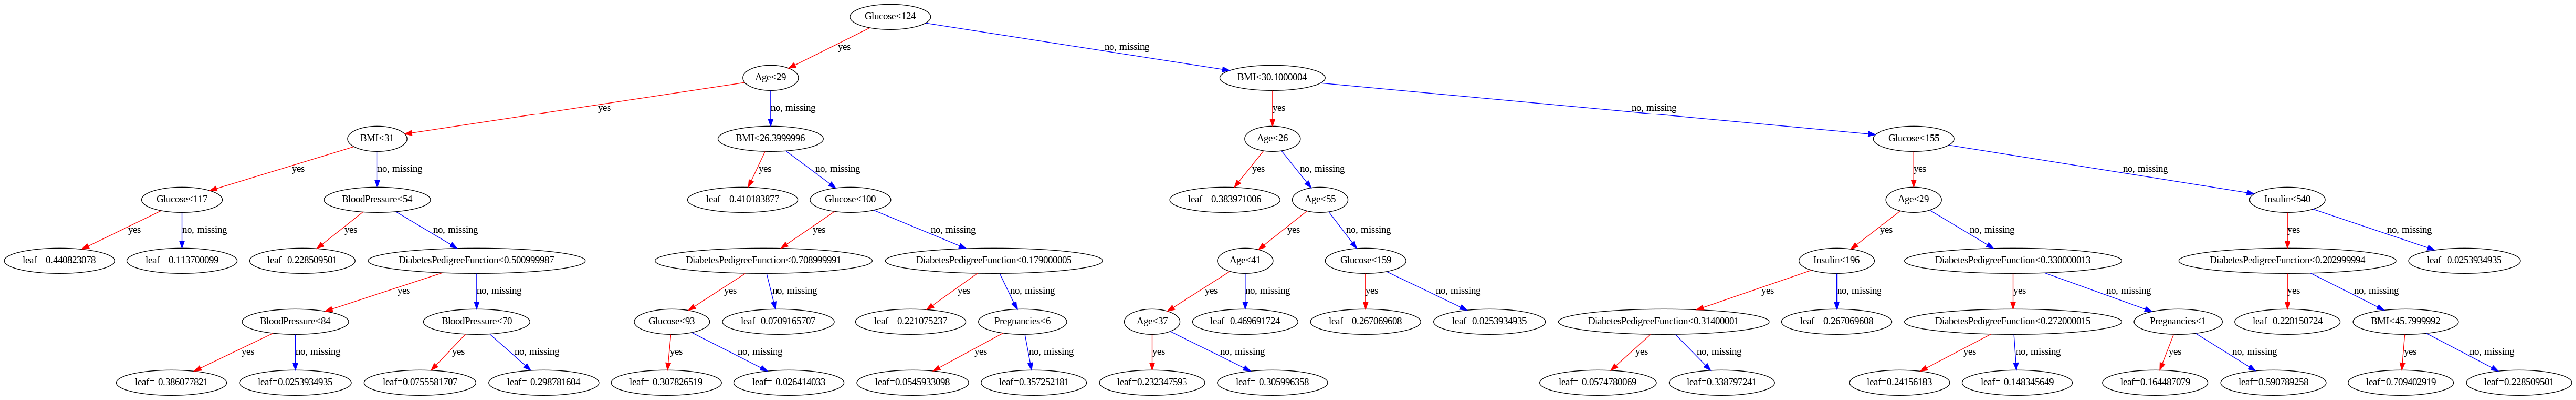

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt ## 차트를 그리기 위한 라이브러리
from matplotlib.pylab import rcParams ## 차트의 크기를 조절하기 위한 라이브러리

## 오류 무시
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 200, 100 ## 차트의 크기를 조절

## 트리를 그린다.
plot_tree(model)
plt.show() ## 차트를 보여준다.

hahahahahahhahahahaha